In [3]:
import numpy
import os

import scipy.sparse as sparse
import scipy.sparse.linalg

import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
# domaine spatial et maillage
X_min = 0
X_max = 1
Nx = 1000
h = 1/Nx
X = numpy.zeros(Nx)
for i in range(0,Nx):
    X[i] = X_min + i*h*(X_max-X_min)


In [5]:
# domaine temporel
Temps_final = 2
Nt = 200
dt = Temps_final * 1./Nt


In [6]:
# fonction initiale
def u_ini(x):
    return numpy.sin(2*numpy.pi*x)

# champ vitesse
def a_func(x):
    return 0.5

# solution approchee 
u_tx = numpy.zeros((Nt+1, Nx))

In [7]:
# sol exacte  --  lorsqu'elle est connue !
def u_ex(t,x):
    return u_ini(x-a_func(x)*t)

In [8]:
def plot_sol(nt, plot_u_ex=False, Y_min=None, Y_max=None):
    if plot_u_ex:
        plt.plot(X, u_ex(nt*dt,X), '-', color='r')
        
    plt.xlim(X_min, X_max)
    plt.ylim(Y_min, Y_max)
    plt.xlabel('x')
    plt.plot(X, u_tx[nt,:], '-', color='k')
    plt.show()


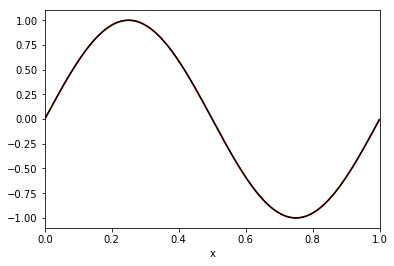

In [9]:
## initialisation de la solution avec u_ini
u_tx[0,:] = u_ini(X)
plot_sol(0, plot_u_ex=True)


In [14]:
# choix du type de schema: implicite ou explicite
implicit_scheme = True


In [15]:
# assemblage d'une matrice creuse M (pour un schema implicite)
if implicit_scheme:
    row = list()
    col = list()
    data = list()
    for i in range(0,Nx):

        # M_i,i = qque chose (exemple)
        row.append((i))
        col.append((i))
        data.append( 1.3 )  
    
        # M_i,i+1 = autre chose (exemple)
        row.append((i))
        col.append((numpy.mod(i+1,Nx)))  # modulo pour conditions periodiques
        data.append( -0.3 )

    row = numpy.array(row)
    col = numpy.array(col)
    data = numpy.array(data)      
    M = (sparse.coo_matrix((data, (row, col)), shape=(Nx, Nx))).tocsr()
else:
    M = None

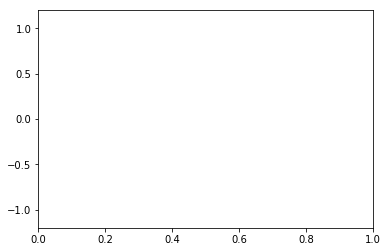

In [16]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# on garde les bornes pour afficher les solutions
u_min = min(u_tx[0,:])
u_max = max(u_tx[0,:])
Y_min = u_min - 0.1*(u_max-u_min)
Y_max = u_max + 0.1*(u_max-u_min)    

ax.set_xlim(( 0, 1))
ax.set_ylim((Y_min, Y_max))

line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2, color='r')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    return (line,line2)


In [17]:
## schema numerique  

for nt in range(0,Nt):               
    if implicit_scheme:
        u_tx[nt+1,:] = sparse.linalg.spsolve(M, u_tx[nt,:])

    else:
        for i in range(0,Nx):        
            u_tx[nt+1,i] = u_tx[nt,i] * 0.9  # (exemple)

    #plot_sol(nt+1, plot_u_ex=True)


In [18]:
# animation function
def animate(nt):
    line.set_data(X, u_tx[nt,:])
    line2.set_data(X, u_ex(nt*dt,X))
    return (line,line2)
#plt.show()    

In [19]:
# call the animator. 
# interval: Delay between frames in milliseconds. Defaults to 200.
# blit=True means only re-draw the parts that have changed.
# see https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt+1, interval=20, blit=True)
HTML(anim.to_html5_video())